# Analysis part - Blastoise___Holo_1999_Base_Set

In [1]:
library(ggplot2)
library(quantreg)


df = read.csv('lagged_merged_datasets_final/merged_Full_Art_Charizard_GX_2019_Hidden_Fates.csv')

#convert prices to returns
grades <- grep("grade[0-9]+price", names(df), value = TRUE)
grade_returns <- sapply(grades, function(x) paste0(x, "_return"))

for(grade in grades) {
  df[paste(grade, "return", sep = "_")] <- c(NA, diff(log(df[[grade]])))
}

# Convert adjclosestock and adjclosebond (including their lags) to returns
stock_bond_cols <- grep("adjclose(stock|bond)(lag[0-9]+)?", names(df), value = TRUE)

for(col in stock_bond_cols) {
  df[paste0(col, "_return")] <- c(NA, diff(log(df[[col]])))
}

# Remove rows with NA in the newly created return columns
df <- na.omit(df)

head(df)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'quantreg' was built under R version 3.6.3"Loading required package: SparseM
Warning message:
"package 'SparseM' was built under R version 3.6.3"
Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



,date,grade8price,grade9price,grade10price,adjclosestock,volume,adjclosebond,stockreturns,bondadjusted,excessreturns,...,adjclosestocklag2_return,adjclosebondlag2_return,adjclosestocklag3_return,adjclosebondlag3_return,adjclosestocklag4_return,adjclosebondlag4_return,adjclosestocklag5_return,adjclosebondlag5_return,adjclosestocklag6_return,adjclosebondlag6_return
2,2019-10-01,295,358.5167,649.7061,3037.56,77720640000,2.176,0.020431771,0.02176,-0.005499425,...,-0.01825728,-0.24899925,0.01304272,-0.0003957135,0.06665830,-0.0215229704,-0.06804089,-0.1294581081,0.03856040,0.0409637379
3,2019-11-01,295,358.5167,543.1000,3140.98,72410620000,2.202,0.034047038,0.02202,0.022098608,...,0.01703525,0.07385414,-0.01825728,-0.2489992515,0.01304272,-0.0003957135,0.06665830,-0.0215229704,-0.06804089,-0.1294581081
4,2019-12-01,295,308.3333,482.5192,3230.78,72325540000,2.389,0.028589819,0.02389,-0.056332999,...,0.02022584,0.02560068,0.01703525,0.0738541426,-0.01825728,-0.2489992515,0.01304272,-0.0003957135,0.06665830,-0.0215229704
5,2020-01-01,295,305.7600,499.8989,3225.52,77287980000,2.015,-0.001628093,0.02015,0.154922700,...,0.03348027,0.01187761,0.02022584,0.0256006835,0.01703525,0.0738541426,-0.01825728,-0.2489992515,0.01304272,-0.0003957135
6,2020-02-01,295,237.5000,496.6771,2954.22,84436590000,1.671,-0.084110484,0.01671,0.086609161,...,0.02818876,0.08150885,0.03348027,0.0118776108,0.02022584,0.0256006835,0.01703525,0.0738541426,-0.01825728,-0.2489992515
7,2020-03-01,295,292.1862,511.1980,2584.59,162185380000,1.351,-0.125119282,0.01351,0.066382843,...,-0.00162942,-0.17025560,0.02818876,0.0815088487,0.03348027,0.0118776108,0.02022584,0.0256006835,0.01703525,0.0738541426


                               volume  volumelag1   volumelag2   volumelag3
volume                    1.000000000  0.27895530  0.195398277  0.200676063
volumelag1                0.278955303  1.00000000  0.338582368  0.205682254
volumelag2                0.195398277  0.33858237  1.000000000  0.380378023
volumelag3                0.200676063  0.20568225  0.380378023  1.000000000
volumelag4               -0.122494787  0.21073378  0.246591693  0.396452756
volumelag5               -0.173413852 -0.11211910  0.239441003  0.261294832
volumelag6               -0.122607277 -0.13732240 -0.085171182  0.270309928
grade8price_return       -0.108521023 -0.06338194  0.003704025 -0.116774641
grade9price_return        0.418289155  0.40156161  0.263104657  0.253154832
grade10price_return       0.312809967  0.45811716  0.297156318  0.385201450
adjclosestock_return     -0.132047864  0.28829853  0.238699792 -0.087049446
adjclosebond_return      -0.094514590  0.06061198  0.308713987  0.126754870
adjclosestoc

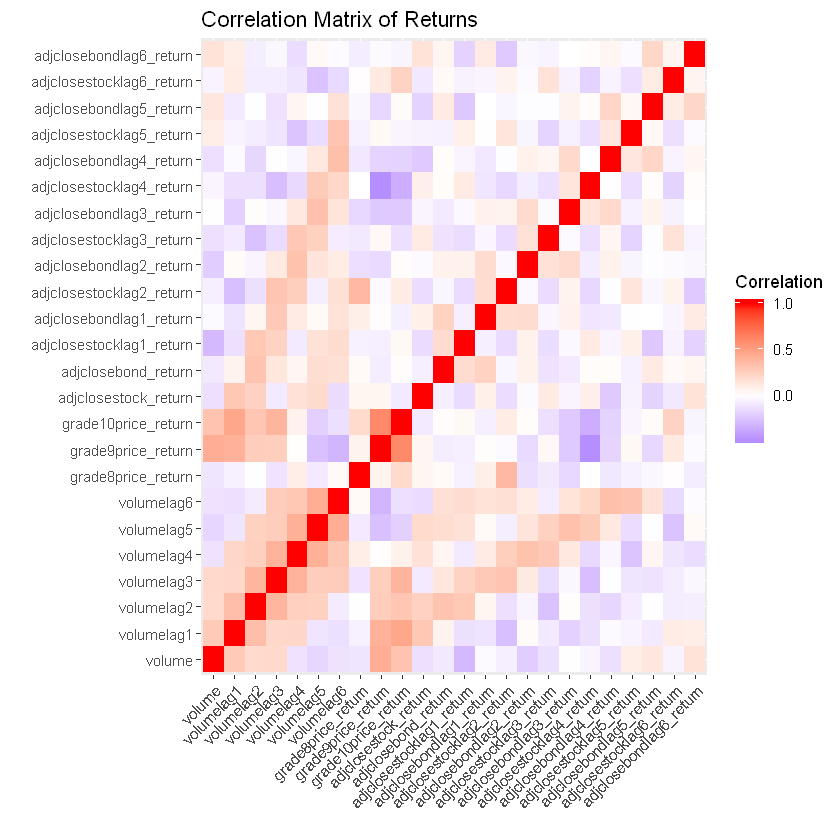

In [2]:
createReturnsCorrelationMatrix <- function(df) {
  # Load necessary libraries
  library(ggplot2)
  library(reshape2)
  
  # Use a simplified pattern to include both "_return" columns and any "volume" columns
  pattern <- "_return|volume"
  selected_columns <- grep(pattern, names(df), value = TRUE)
  
  # Calculate the correlation matrix for the selected columns
  correlation_matrix <- cor(df[, selected_columns], use = "complete.obs")
  
  # Print the correlation matrix to the console
  print(correlation_matrix)
  
  # Melt the correlation matrix for visualization
  melted_correlation_matrix <- melt(correlation_matrix)
  
  # Create the ggplot object for the correlation matrix
  plot <- ggplot(data = melted_correlation_matrix, aes(x=Var1, y=Var2, fill=value)) +
    geom_tile() +
    scale_fill_gradient2(midpoint=0, low="blue", high="red", mid="white") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x='', y='', title='Correlation Matrix of Returns', fill='Correlation')
  
  # Explicitly print the ggplot object to ensure it's displayed
  print(plot)
  
  # Return the correlation matrix as well
  return(correlation_matrix)
}

# Assuming your adjusted dataset is in 'df'
# Example usage:
correlation_matrix <- createReturnsCorrelationMatrix(df)


## VAR model - try later - if enough time...

In [3]:
#install.packages('vars', type = 'binary')
library(vars)

# Assuming 'data_var_subset' is a dataframe with the relevant variables for VAR model
data_var_subset <- df[c("grade10price", "adjclosestock")]

# Determine optimal number of lags
var1.select <- VARselect(data_var_subset, lag.max=6, type="const")
var1.select$selection

# Once you have the optimal number of lags, you can fit the VAR model
#optimal_lags <- var1.select$selection["AIC"]  # Choosing based on AIC, for example
#var_model <- VAR(data_var_subset, p=optimal_lags, type="const")

# Now, 'var_model' contains your fitted VAR model with the optimal lag length


Warning message:
"package 'vars' was built under R version 3.6.3"Loading required package: MASS
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: urca
Warning message:
"package 'urca' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"

AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

## Visualisation

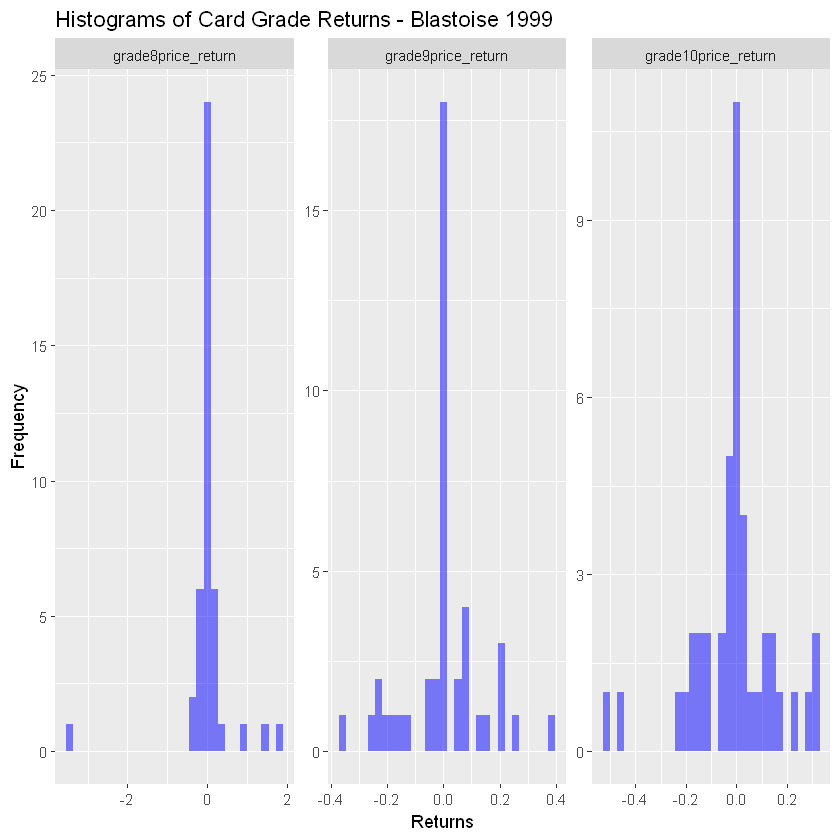

In [4]:

#create a long format data frame suitable for faceting with returns
long_df <- reshape2::melt(df, id.vars = "date", measure.vars = grade_returns)

#histograms for card grade returns
p1 <- ggplot(long_df, aes(x = value)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.5) +
  facet_wrap(~ variable, scales = "free") +
  labs(x = "Returns", y = "Frequency", title = "Histograms of Card Grade Returns - Blastoise 1999")

print(p1)

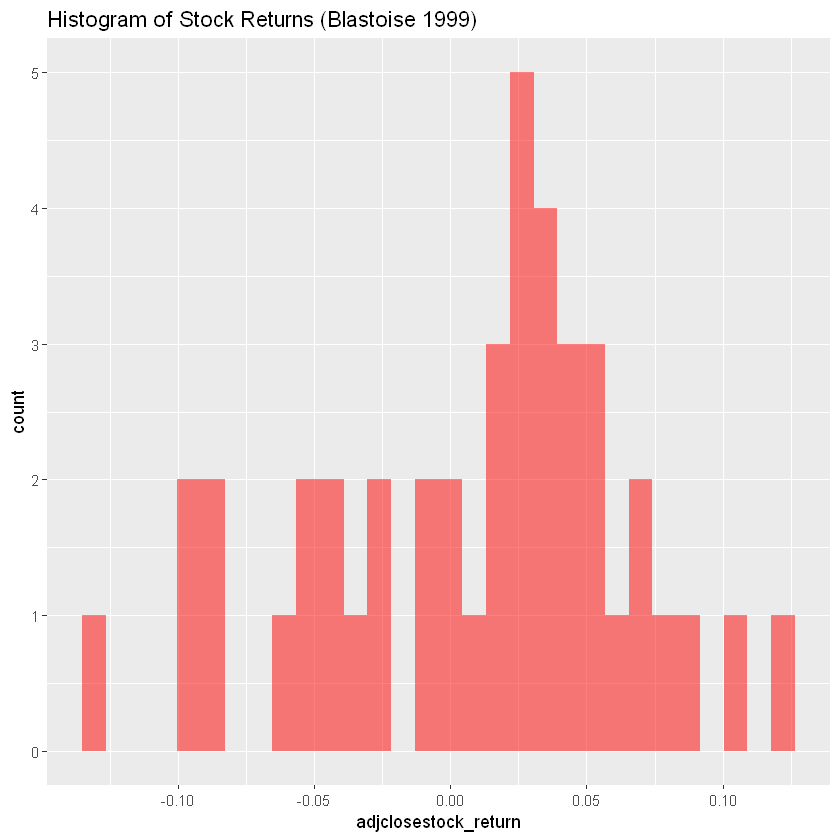

In [5]:
#histogram of stock returns
p2 <- ggplot(df, aes(x = adjclosestock_return)) +
  geom_histogram(bins = 30, fill = "red", alpha = 0.5) +
  labs(title = "Histogram of Stock Returns (Blastoise 1999)")

print(p2)

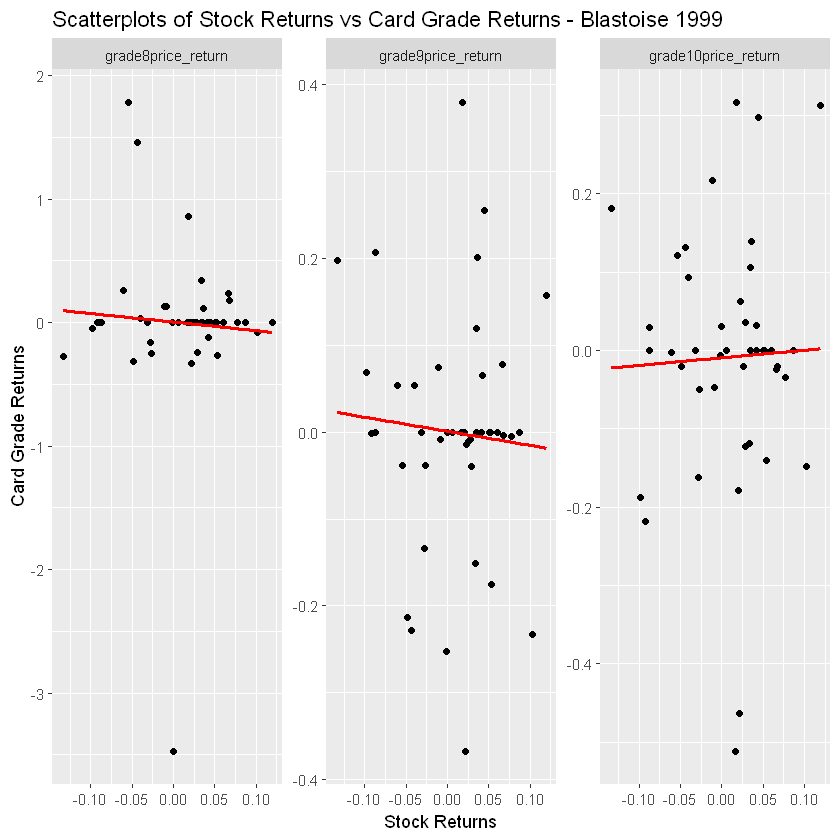

In [6]:
#a long format data frame suitable for scatterplots with returns
long_df <- reshape2::melt(df, id.vars = c("date", "adjclosestocklag1_return"), measure.vars = grade_returns) #ADJUST FOR DIFFERENT LAGS

#scatterplots between stock returns and card grades returns
p3 <- ggplot(long_df, aes(x = adjclosestocklag1_return, y = value)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  facet_wrap(~ variable, scales = "free") +
  labs(x = "Stock Returns", y = "Card Grade Returns", title = "Scatterplots of Stock Returns vs Card Grade Returns - Blastoise 1999")

print(p3)

## Choose the variables using AIC

In [7]:

# Load necessary library
library(stats)

# Preparing the initial full model with the dependent variable (choosing one of the grade prices as an example)
# and all potential independent variables (using returns and lagged returns)
# Note: Adjust 'grade5price' to the specific grade price return you are analyzing
full_model <- lm(grade10price_return ~ adjclosestock_return + adjclosebond_return +
                 adjclosestocklag1_return + adjclosebondlag1_return +
                 adjclosestocklag2_return + adjclosebondlag2_return +
                 adjclosestocklag3_return + adjclosebondlag3_return +
                 adjclosestocklag4_return + adjclosebondlag4_return +
                 adjclosestocklag5_return + adjclosebondlag5_return +
                 adjclosestocklag6_return + adjclosebondlag6_return +
                 volume + volumelag1 + volumelag2 + volumelag3 + 
                 volumelag4 + volumelag5 + volumelag6, data = df)

# Perform backward elimination based on AIC
reduced_model <- step(full_model, direction = "backward")

# Display the summary of the reduced model to see the selected variables and their coefficients
summary(reduced_model)


Start:  AIC=-146.51
grade10price_return ~ adjclosestock_return + adjclosebond_return + 
    adjclosestocklag1_return + adjclosebondlag1_return + adjclosestocklag2_return + 
    adjclosebondlag2_return + adjclosestocklag3_return + adjclosebondlag3_return + 
    adjclosestocklag4_return + adjclosebondlag4_return + adjclosestocklag5_return + 
    adjclosebondlag5_return + adjclosestocklag6_return + adjclosebondlag6_return + 
    volume + volumelag1 + volumelag2 + volumelag3 + volumelag4 + 
    volumelag5 + volumelag6

                           Df Sum of Sq     RSS     AIC
- volumelag5                1  0.000119 0.51222 -148.50
- adjclosebondlag6_return   1  0.000748 0.51285 -148.45
- adjclosestocklag3_return  1  0.001864 0.51397 -148.35
- adjclosestocklag6_return  1  0.002391 0.51449 -148.31
- adjclosestocklag1_return  1  0.004081 0.51618 -148.17
- volumelag3                1  0.004928 0.51703 -148.10
- volume                    1  0.005516 0.51762 -148.05
- adjclosebondlag3_return   1  


Call:
lm(formula = grade10price_return ~ adjclosestock_return + adjclosestocklag4_return + 
    adjclosebondlag4_return + volumelag1 + volumelag3, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39815 -0.06083  0.03369  0.06482  0.19716 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -5.745e-01  1.481e-01  -3.880 0.000415 ***
adjclosestock_return     -6.889e-01  3.893e-01  -1.770 0.084988 .  
adjclosestocklag4_return -6.279e-01  3.739e-01  -1.679 0.101554    
adjclosebondlag4_return  -3.673e-01  1.951e-01  -1.882 0.067695 .  
volumelag1                4.160e-12  1.245e-12   3.341 0.001918 ** 
volumelag3                1.958e-12  1.215e-12   1.612 0.115552    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1322 on 37 degrees of freedom
Multiple R-squared:  0.4325,	Adjusted R-squared:  0.3558 
F-statistic: 5.639 on 5 and 37 DF,  p-value: 0.0005824


## Models

### OLS

In [67]:
#OLS
ols_model <- lm(grade10price_return ~ adjclosestocklag1_return + 
    adjclosebondlag3_return + log(volumelag3)  , data = df) 

print(summary(ols_model))

library(car)

# Calculate VIF
vif_result <- vif(ols_model)
print(vif_result)

library(lmtest)

# Perform the Breusch-Pagan test
bp_test <- bptest(ols_model)

# Print the test results
print(bp_test)



Call:
lm(formula = grade10price_return ~ adjclosestocklag1_return + 
    adjclosebondlag3_return + log(volumelag3), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74879 -0.11544  0.00362  0.10559  0.89234 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)               -7.2267     4.1598  -1.737  0.08645 . 
adjclosestocklag1_return  -1.0015     0.6166  -1.624  0.10850   
adjclosebondlag3_return   -1.1364     0.3355  -3.387  0.00113 **
log(volumelag3)            0.2891     0.1654   1.747  0.08466 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2606 on 75 degrees of freedom
Multiple R-squared:  0.1754,	Adjusted R-squared:  0.1424 
F-statistic: 5.317 on 3 and 75 DF,  p-value: 0.002238

adjclosestocklag1_return  adjclosebondlag3_return          log(volumelag3) 
                1.016533                 1.001760                 1.017718 

	studentized Breusch-Pagan test

data

### Quantile regression

In [69]:
#Quantile regression
library(quantreg)

quantile_model <- rq(grade10price_return ~ adjclosestocklag1_return + adjclosebondlag3_return + log(volumelag3) , data = df, tau = seq(from=0.05, to=0.95, by=0.05))  #change tau for different quantiles
                                                                                                                                   

#print summary of quantile regression models
for(grade_return in grade_returns) {
  #print(paste("Summary of quantile regression model for:", grade_return))
  #print(summary(quantile_models[[grade_return]]))
}

#uncomment the last two commented rows (in the previous loop) if you want to see the results for quantiles from 0.05 to 0.95, by 0.05 step




#### Results for different quantiles of the grade 10 prices x OLS estimates (red line) 

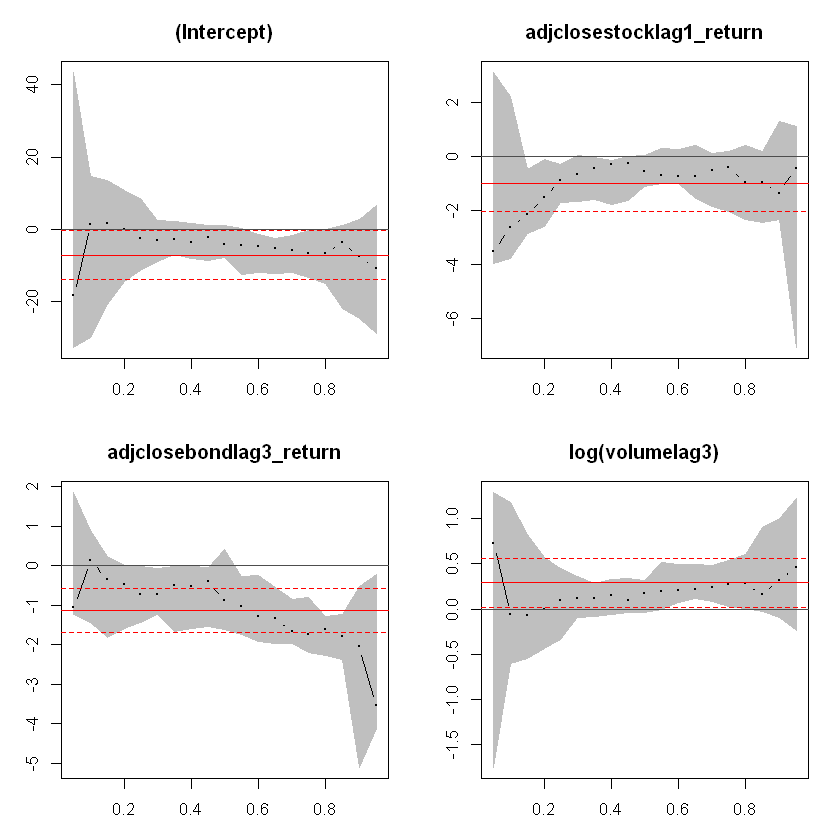

In [72]:

plot(summary(quantile_model))
